Enter file count:  11_0.4


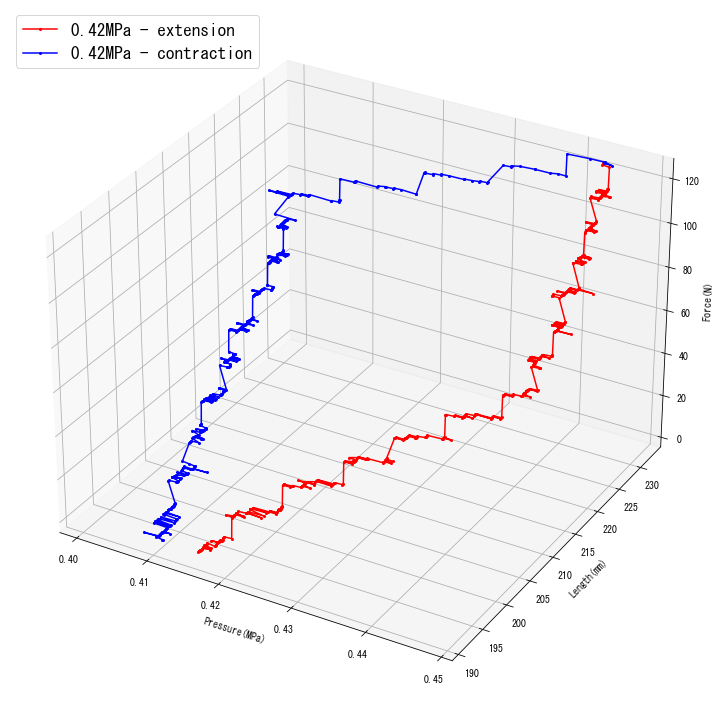

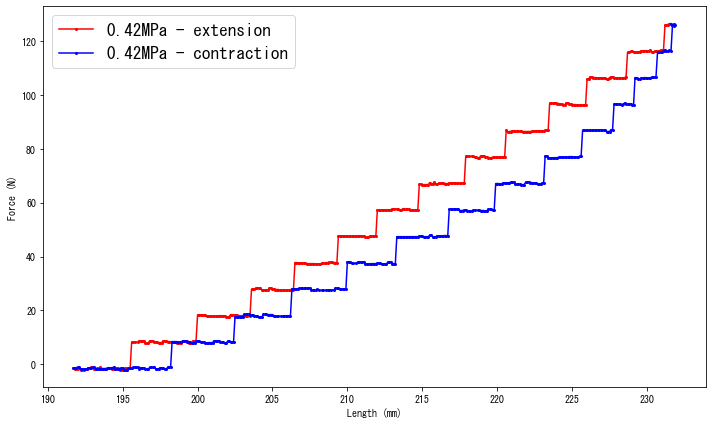

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

# データの読み込み
current_date = datetime.now().strftime("%Y%m%d")
file_count = input("Enter file count: ") 
input_file_path = f"C:\\Users\\Mizuki\\JupyterLab\\length_sensor\\data\\real\\real_{current_date}_{file_count}.csv"
#input_file_path = f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real\\real_{current_date}_{file_count}.csv"
df = pd.read_csv(input_file_path)


# "Length"列の重複を削除
cleaned_df = df[df['Length'] != df['Length'].shift()]

# クリーンなデータを別のファイルとして保存
#output_file_path = f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_processed\\p_real_{current_date}_{file_count}.csv"
output_file_path = f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_processed\\p_real_{current_date}_{file_count}.csv"
cleaned_df.to_csv(output_file_path, index=False)

%matplotlib inline

current_date = datetime.now().strftime("%Y%m%d")
plt.rcParams['font.family'] = 'MS Gothic'  # 凡例やラベルに日本語を使っても文字化けしないようにする

# データの読み込み
data_path = f"C:\\Users\\Mizuki\\JupyterLab\\length_sensor\\data\\real_processed\\p_real_{current_date}_{file_count}.csv"
#data_path = f"C:\\Users\\Mizuki\\\\data\\real_processed\\p_real_{current_date}_{file_count}.csv"
dt = pd.read_csv(data_path)

# 列の選択
column = dt[["Pressure", "Length", "Force"]]

# 最初のPressureデータを取得して四捨五入
first_pressure = round(column["Pressure"].iloc[0], 2)  # 少数第三位を四捨五入

# グラフの作成
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# 最初のデータからForceが最大値を取るデータまでの範囲（赤色）
ax.plot(column["Pressure"].iloc[:column["Force"].idxmax()+1], 
        column["Length"].iloc[:column["Force"].idxmax()+1], 
        column["Force"].iloc[:column["Force"].idxmax()+1], 
        c='r',marker = 'o',markersize = 2, label=f'{first_pressure}MPa - extension')

# Forceが最大値を取ったデータから最後のデータまでの範囲（青色）
ax.plot(column["Pressure"].iloc[column["Force"].idxmax()+1:], 
        column["Length"].iloc[column["Force"].idxmax()+1:], 
        column["Force"].iloc[column["Force"].idxmax()+1:], 
        c='b',marker = 'o',markersize = 2,label=f'{first_pressure}MPa - contraction')

# 軸ラベルの設定
ax.set_xlabel('Pressure(MPa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('Force(N)')

# x軸のメモリフォーマットと設定
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # 少数第二位まで表示

# 凡例の表示
ax.legend(loc = 'upper left',fontsize = 'xx-large')

# グラフの保存
save_path = f'C:\\Users\\Mizuki\\JupyterLab\\length_sensor\\graph\\real\\real_single_{current_date}_{file_count}-1.jpg'
#save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\\graph\\single\\real_single_{current_date}_{file_count}-1.jpg'
plt.savefig(save_path,bbox_inches='tight')

plt.tight_layout()  # 追加：グラフが適切にレイアウトされるように
plt.show()


#以下2D


# データの読み込み
dt = pd.read_csv(f"C:\\Users\\Mizuki\\JupyterLab\\length_sensor\\data\\real_processed\\p_real_{current_date}_{file_count}.csv")
#dt = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_processed\\p_real_{current_date}_{file_count}.csv")

# 列の選択（Pressure列を削除）
column = dt[["Length", "Force"]]

# 最初のPressureデータを取得して四捨五入
first_pressure = round(dt["Pressure"].iloc[0], 2)  # 少数第三位を四捨五入

# 二次元プロット
fig, ax = plt.subplots(figsize=(10,6))

# Forceが最大値を取るまでの範囲を赤でプロット
ax.plot(column["Length"][:dt["Force"].idxmax() + 1], column["Force"][:dt["Force"].idxmax() + 1], c='r',marker = 'o',markersize = 2,label=f'{first_pressure}MPa - extension')

# Forceが最大値を取った後の範囲を青でプロット
ax.plot(column["Length"][dt["Force"].idxmax() + 1:], column["Force"][dt["Force"].idxmax() + 1:], c='b',marker = 'o',markersize = 2,label=f'{first_pressure}MPa - contraction')

# 軸ラベルの設定
ax.set_xlabel('Length (mm)')
ax.set_ylabel('Force (N)')

# 軸のメモリのフォーマットおよび設定
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# 凡例の表示
ax.legend(loc = 'upper left',fontsize = 'xx-large')

# 保存パスとファイル名を指定してグラフを画像として保存（JPG形式）
save_path = f'C:\\Users\\Mizuki\\JupyterLab\\length_sensor\\graph\\real\\real_single_{current_date}_{file_count}-2.jpg'
#save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\\graph\\single\\real_single_{current_date}_{file_count}-2.jpg'
plt.savefig(save_path,bbox_inches='tight')

# グラフの表示
plt.tight_layout()  # 追加：グラフが適切にレイアウトされるように
plt.show()